Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## 1. Data Reading/Data Understanding
### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [2]:
## Mounting from the Skin Cancer dataset from Google Drive :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ls "/content/gdrive/MyDrive/app/"

 1.+Cifar_10_with_dropout_without_BN.ipynb
 2.+Cifar_10_Notebook_with_BN_without_dropout.ipynb
 3.+Cifar_10_notebook.ipynb
 4.+Cifar10_l2_notebook.ipynb
 5.+Cifar10_l2_dropout_notebook.ipynb
 6.+Cifar10_morelayer_notebook.ipynb
 7.+Cifar10_feature_map_updated.ipynb
 Building+a+CNN+-+MNIST.ipynb
 CNN_assignment.zip
'Melanoma Detection Skin Care ISIC.ipynb'
 NN_Practice1.ipynb
 Practice1.ipynb
 Starter_code_Assignment_CNN_Skin_Cancer_Final.ipynb
 Starter_code_Assignment_CNN_Skin_Cancer.ipynb
 Transfer_Learning_Notebook.ipynb


In [4]:
!unzip -o "/content/gdrive/MyDrive/app/CNN_assignment.zip" -d "/content/gdrive/MyDrive/app/"

Archive:  /content/gdrive/MyDrive/app/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/gdrive/MyDrive/app/Skin cancer ISIC The Internation

In [5]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test  = pathlib.Path("/content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [7]:
#list directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [8]:
#list directory in test folder
dir_test = os.listdir(data_dir_test)
dir_test.sort()
dir_test

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

## 2. DataSet Creation

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Creating train & validation dataset from the train directory with a batch size of 32 X 180 X 180.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,
                                                               subset = 'training',seed = 123,
                                                               image_size = (img_height, img_width),
                                                               batch_size = batch_size)
train_ds

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split = 0.2,
                                                             subset = 'validation',seed = 123,
                                                             image_size = (img_height, img_width),
                                                             batch_size = batch_size)
val_ds

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# Listing out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
print(class_names)
num_classes=len(class_names)
print(num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [13]:
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [14]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [15]:
num_classes

9

## 3. Data Visualization
### Visualize the data
#### Creating a code to visualize one instance of all the nine classes present in the dataset

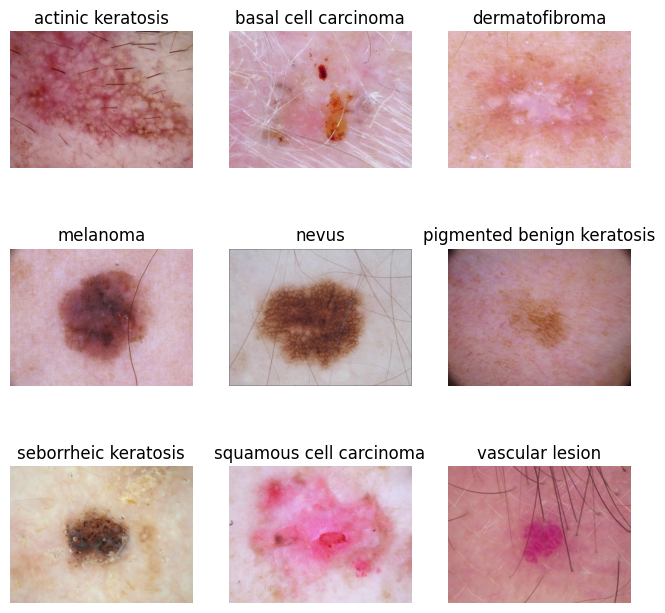

In [16]:
import matplotlib.pyplot as plt
## plotting some random 9 images
from PIL import Image
fig=plt.figure(figsize=(8,8))
counter=1
for f in data_dir_train.iterdir():
  im=Image.open(f.iterdir().__next__())
  plt.subplot(3,3,counter)
  plt.imshow(im)
  plt.title(str(f).split('/')[-1])
  counter+=1
  plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Model Building & training


### Create the model
#### **Model 1** : Base Model Building
#### Creating a CNN model, which can accurately detect 9 classes present in the dataset.
#### The Model consists of 3 Conv layers & Max Pool layer, inbetween along with Activation Function. Then finally flattening it and passing it to Dense layer.

In [18]:
model1 = Sequential()
model1.add(layers.Rescaling(1./255,input_shape=(img_width,img_height,3)))
model1.add(Conv2D(16, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dense(num_classes))

### Compile the model
Choose an appropriate optimiser and loss function for model training

In [19]:
### Choosing an appropirate optimiser and loss function
model1.compile(optimizer='Adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# Viewing the summary of all layers
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 activation (Activation)     (None, 178, 178, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 87, 87, 32)        0         
                                                        

### Train the model

#### Training the model with 20 epochs

In [21]:
epochs = 20
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 26s 85ms/step - loss: 1.8748 - accuracy: 0.3292 - val_loss: 1.8744 - val_accuracy: 0.3177
Epoch 2/20
56/56 [==============================] - 1s 20ms/step - loss: 1.5892 - accuracy: 0.4263 - val_loss: 1.5447 - val_accuracy: 0.4765
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.4672 - accuracy: 0.4877 - val_loss: 1.4525 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3816 - accuracy: 0.5190 - val_loss: 1.3759 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2970 - accuracy: 0.5491 - val_loss: 1.4337 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2227 - accuracy: 0.5664 - val_loss: 1.3167 - val_accuracy: 0.5526
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1673 - accuracy: 0.5893 - val_loss: 1.3737 - val_accuracy: 0.5056
Epoch 8/20
5

### Visualizing training results

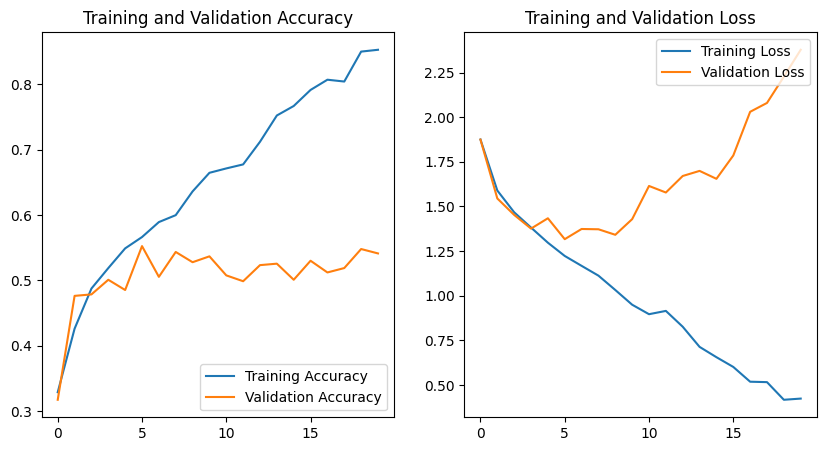

In [22]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### We get a Model accuracy of 85.27% and Validation accuracy of 54.14% which means there is overfitting.

Training Accuracy : Training Accuracy is high. \
Validation Accuracy : Validation accuracy is low compared to the Training Accuracy so , its not a good model and it is Overfitting. \
i.e Training Accuracy is around 80% but Validation Accuracy is just 50% hence overfitting is observed. \
Training Loss : Its decreasing \
Validation Loss : its increasing per epoch so not a good fit

#### **Model 2** : Adding "Dropout" layers in the model after all the conv layer
### Create the model, compile and train the model

In [23]:
model2 = Sequential()
model2.add(layers.Rescaling(1./255,input_shape=(img_width,img_height,3)))
model2.add(Conv2D(16, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))

### Compiling the model

In [24]:
model2.compile(optimizer='Adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [25]:
epochs = 20
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 31ms/step - loss: 1.9670 - accuracy: 0.2734 - val_loss: 1.8229 - val_accuracy: 0.4094
Epoch 2/20
56/56 [==============================] - 2s 27ms/step - loss: 1.6313 - accuracy: 0.4035 - val_loss: 1.6151 - val_accuracy: 0.4251
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.5470 - accuracy: 0.4297 - val_loss: 1.6500 - val_accuracy: 0.3982
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.4852 - accuracy: 0.4526 - val_loss: 1.5620 - val_accuracy: 0.4519
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3930 - accuracy: 0.5073 - val_loss: 1.4708 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3278 - accuracy: 0.5234 - val_loss: 1.4475 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 2s 27ms/step - loss: 1.2650 - accuracy: 0.5536 - val_loss: 1.4804 - val_accuracy: 0.4787
Epoch 8/20
56

### Visualizing the results

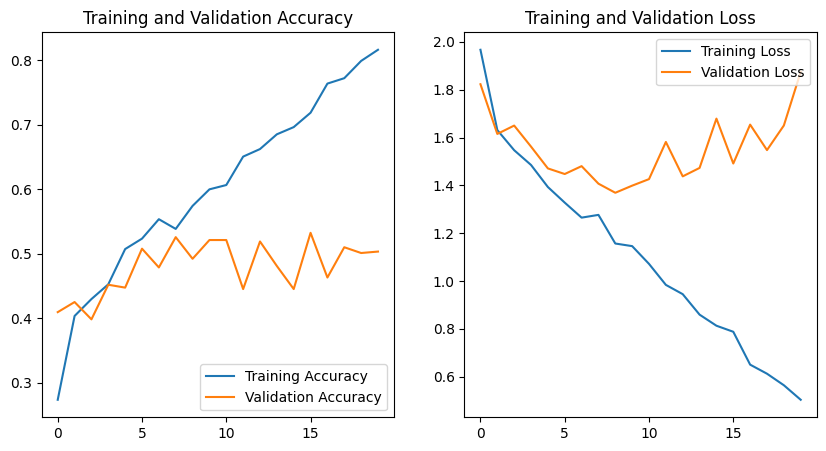

In [26]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### We get a Model accuracy of 81.64% and Validation accuracy of 50.34%. Both the accuracies have reduced. So trying another option

#### **Model 3** : Adding "Dropout" layers after all the conv layer and also adding Batch Normalization
### Create the model, compile and train the model

In [27]:
model3 = Sequential()
model3.add(layers.Rescaling(1./255,input_shape=(img_width,img_height,3)))
model3.add(Conv2D(16, (3, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dense(num_classes))

### Compile the model

In [28]:
model3.compile(optimizer='Adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Fit the model

In [29]:
epochs = 20
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 44ms/step - loss: 3.9326 - accuracy: 0.2829 - val_loss: 16.4236 - val_accuracy: 0.0492
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.8588 - accuracy: 0.3438 - val_loss: 20.5149 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 3s 45ms/step - loss: 1.5925 - accuracy: 0.4375 - val_loss: 16.5322 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 2s 42ms/step - loss: 1.4645 - accuracy: 0.4799 - val_loss: 9.2613 - val_accuracy: 0.1588
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3821 - accuracy: 0.4978 - val_loss: 8.4100 - val_accuracy: 0.1723
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.1967 - accuracy: 0.5569 - val_loss: 7.4964 - val_accuracy: 0.2282
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 1.1579 - accuracy: 0.5753 - val_loss: 7.4017 - val_accuracy: 0.2729
Epoch 8/20

Seems like adding the Dropouts & Batch Normalization is not working as the Training accuracy is 87.05% and Validation accuracy is just 43.4%

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


#### As we can see few classes have more number of images but few has very less images hence Class Imbalance is there. Augmentation is a technique through which the images are created & Class balance is maintained.

#### - Which class has the least number of samples?
-- "**Dermatofibroma**" has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
-- "**Pigmented benign keratosis**" class dominate the data in terms proportionate number of samples

<BarContainer object of 9 artists>

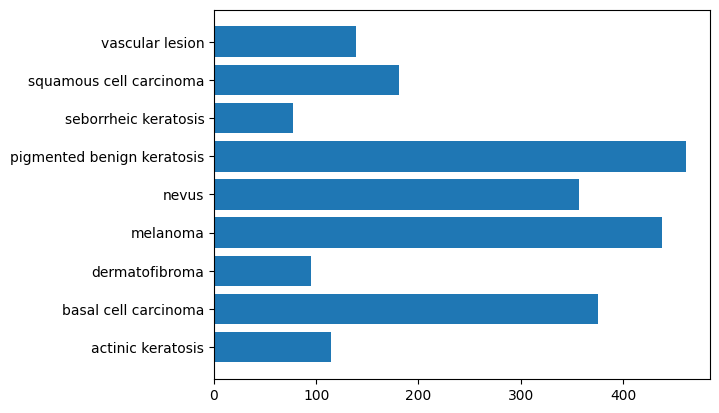

In [31]:
import seaborn as sns
plt.barh(df['Class'],df['No. of Image'])

#### Python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) is used to add more samples across all classes so that none of the classes have very few samples.

In [32]:
pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B77204C3A60>: 100%|██████████| 500/500 [00:26<00:00, 18.93 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B77205D3D60>: 100%|██████████| 500/500 [00:20<00:00, 24.46 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B7720610430>: 100%|██████████| 500/500 [00:21<00:00, 23.78 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7B7720569030>: 100%|██████████| 500/500 [01:39<00:00,  5.01 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B772058BBB0>: 100%|██████████| 500/500 [01:11<00:00,  7.04 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B772038B8B0>: 100%|██████████| 500/500 [00:18<00:00, 26.42 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B77204F3490>: 100%|██████████| 500/500 [00:40<00:00, 12.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B772058BF40>: 100%|██████████| 500/500 [00:18<00:00, 26.92 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B77205D3EB0>: 100%|██████████| 500/500 [00:21<00:00, 23.77 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027615.jpg_7349737e-331f-466d-8cec-4f49ec853cf2.jpg',
 '/content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029025.jpg_54973da5-13ca-4d4f-b934-314aa6f18820.jpg',
 '/content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027896.jpg_56b9ec3f-7c48-4934-ac8c-86b066169307.jpg',
 '/content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029830.jpg_76a5bd27-9995-4181-b51a-816b33e1cc9e.jpg',
 '/content/gdrive/MyDrive/app/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_00321

In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [39]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [40]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,actinic keratosis
1,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,actinic keratosis
2,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,actinic keratosis
3,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,actinic keratosis
4,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,vascular lesion
4496,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,vascular lesion
4497,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,vascular lesion
4498,/content/gdrive/MyDrive/app/Skin cancer ISIC T...,vascular lesion


In [41]:
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Augmentor Model**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### **Augmentor Model:** Create a training dataset

In [43]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Augmentor Model:** Create a validation dataset

In [44]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Augmentor Model:** Create your model (make sure to include normalization)

In [45]:
model_aug = Sequential()
model_aug.add(layers.Rescaling(1./255,input_shape=(img_width,img_height,3)))
model_aug.add(Conv2D(16, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.25))
model_aug.add(Conv2D(32, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.25))
model_aug.add(Conv2D(64, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.25))
model_aug.add(Conv2D(128, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.25))
model_aug.add(Flatten())
model_aug.add(Dense(512))
model_aug.add(Activation('softmax'))
model_aug.add(Dense(num_classes))

#### **Augmentor Model:** Compile your model (Choose optimizer and loss function appropriately)

In [47]:
model_aug.compile(optimizer='Adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Augmentor Model:**  Train your model
#### Training model for 30 epochs, with addition of a conv layer & Feature maps for augmented data

In [48]:
epochs = 30
## Your code goes here, use 50 epochs.
history_aug = model_aug.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 46s 245ms/step - loss: 2.1364 - accuracy: 0.2214 - val_loss: 2.1897 - val_accuracy: 0.1017
Epoch 2/30
169/169 [==============================] - 44s 255ms/step - loss: 2.0730 - accuracy: 0.2461 - val_loss: 2.1611 - val_accuracy: 0.1514
Epoch 3/30
169/169 [==============================] - 43s 249ms/step - loss: 2.0377 - accuracy: 0.2602 - val_loss: 2.0472 - val_accuracy: 0.2324
Epoch 4/30
169/169 [==============================] - 41s 236ms/step - loss: 1.9854 - accuracy: 0.2732 - val_loss: 2.2762 - val_accuracy: 0.1366
Epoch 5/30
169/169 [==============================] - 41s 238ms/step - loss: 1.9761 - accuracy: 0.2695 - val_loss: 1.9833 - val_accuracy: 0.2465
Epoch 6/30
169/169 [==============================] - 42s 240ms/step - loss: 1.9287 - accuracy: 0.2893 - val_loss: 2.0889 - val_accuracy: 0.1952
Epoch 7/30
169/169 [==============================] - 42s 240ms/step - loss: 1.8963 - accuracy: 0.3058 - val_loss: 2.3446 - val_ac

#### **Augmentor Model:**  Visualize the model results

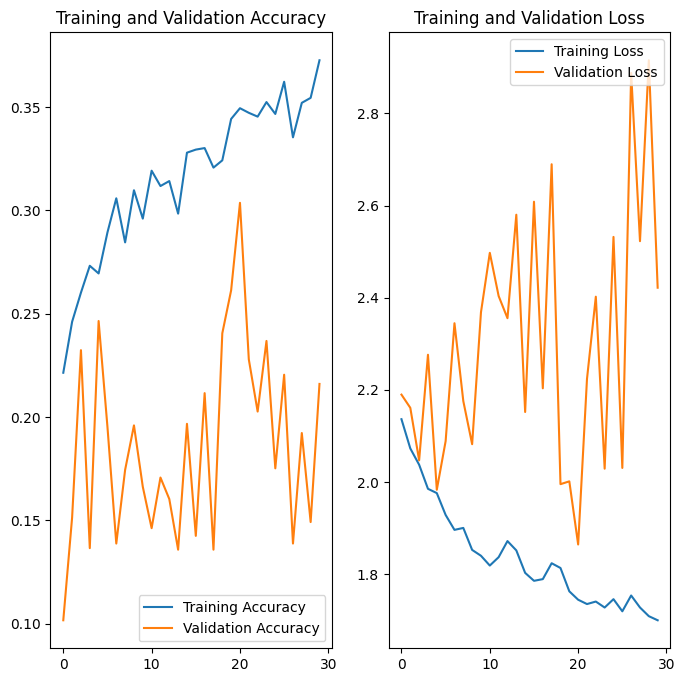

In [49]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After rebalancing of the class the accuracy on the validation set has shown improvement in case of difference between training & validation accuracy. Now training accuracy of ~37%, the validation accuracy of ~22% shows less difference which model is trying to build. This confirms that class rebalance helped in dealing with the overfitting but not helped in increasing the Model accuracy. 